<a href="https://colab.research.google.com/github/ramees-thattarath/TDS-proj-1/blob/main/TDS_proj_1_Analysis_Only.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import pandas as pd
df_users_filtered = pd.read_csv('users.csv')
df_repos_filtered = pd.read_csv('repositories.csv')

In [9]:
df_users_filtered.head()

,login,name,company,location,email,hireable,bio,public_repos,followers,following,created_at
0,krishnaik06,Krish C Naik,PANASONIC IIC,Bangalore,krishnaik06@gmail.com,False,Data Scientist with ML and Deep Learning expe...,330,30927,0,2016-06-20 09:25:45+00:00
1,championswimmer,Arnav Gupta,JIOCINEMA,"Bangalore, India",dev@championswimmer.in,True,Director of Engineering - @JioCinema ┃\r\nPast...,351,4664,29,2012-01-13 07:41:40+00:00
2,arpitbbhayani,Arpit Bhayani,DICEDB,Bangalore,NaN,True,"Creator of @DiceDB • ex-Google Dataproc, ex-Am...",188,4566,3,2013-06-20 06:40:12+00:00
3,manjunath5496,Manjunath.R,MYW3SCHOOLS.COM,"Bangalore, India",manjunath5496@gmail.com,False,"""Science is not only a disciple of reason but,...",1563,4091,9313,2016-06-16 05:02:32+00:00
4,tanaypratap,Tanay Pratap,INVACT,"Bangalore, India",tanay.mit@gmail.com,False,Founder & CEO @invact . Teacher @neogcamp,40,3029,1,2014-12-17 05:15:06+00:00


In [10]:
top_5_users = df_users_filtered.nlargest(5, 'followers')
top_5_users['login'].str.cat(sep=',')

'krishnaik06,championswimmer,arpitbbhayani,manjunath5496,tanaypratap'

In [11]:
df_users_filtered['created_at'] = pd.to_datetime(df_users_filtered['created_at'])
earliest_5_users = df_users_filtered.nsmallest(5, 'created_at')
result = ','.join(earliest_5_users['login'].tolist())
result

'anandology,irfn,jace,abhisek,abhin4v'

In [12]:
license_counts = df_repos_filtered['license_name'].value_counts()
top_3_licenses = license_counts[license_counts.index != ''].nlargest(3).index.tolist()
','.join(top_3_licenses)

'mit,apache-2.0,other'

In [13]:
df_users_filtered['company'].value_counts()

,count
company,
GOOGLE,15
MICROSOFT,9
MASAI SCHOOL,8
RAZORPAY,7
ZERODHA,5
...,...
SDE2 AT TAP INVEST,1
RAKUTEN,1
ITC INFOTECH,1


In [14]:
df_repos_filtered['language'].value_counts()

,count
language,
JavaScript,9659
Python,5757
HTML,3959
Java,3319
Jupyter Notebook,2424
...,...
Typst,1
Sass,1
RAML,1


In [15]:
df_repos_filtered['created_at'] = pd.to_datetime(df_repos_filtered['created_at'])
df_repos_after_2020 = df_repos_filtered[df_repos_filtered['created_at'].dt.year > 2020]
df_repos_after_2020['language'].value_counts()

,count
language,
JavaScript,3710
HTML,1650
Python,1481
TypeScript,1154
CSS,848
...,...
CodeQL,1
Logos,1
JSON,1


In [16]:
df_repos_filtered.groupby('language')['stargazers_count'].mean().nlargest(1)

,stargazers_count
language,
Perl,245.723404


In [17]:
df_users_filtered_c = df_users_filtered.copy()
df_users_filtered_c['leader_strength'] = df_users_filtered.apply(lambda x: x['followers'] / (1 + x['following']), axis=1)
df_users_filtered_c.nlargest(5, 'leader_strength')['login'].str.cat(sep=',')

'krishnaik06,Hack-with-Github,laxmimerit,tanaypratap,abhishh1'

In [18]:
df_users_filtered['followers'].corr(df_users_filtered['public_repos'])

0.1914525346954245

In [19]:
import numpy as np
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(df_users_filtered['public_repos'].to_numpy().reshape(-1, 1), df_users_filtered['followers'].to_numpy().reshape(-1, 1))
model.coef_[0]

array([2.34761399])

In [20]:

has_wiki_s = df_repos_filtered['has_wiki'].apply(lambda x: 1 if x=='true'  else 0)
has_projects_s = df_repos_filtered['has_projects'].apply(lambda x: 1 if x=='true'  else 0)
has_wiki_s.corr(has_projects_s)

/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]


nan

In [21]:
has_wiki_s.value_counts()

,count
has_wiki,
0,54882


In [22]:
avg_following_hireable = df_users_filtered[df_users_filtered['hireable'] == 'true']['following'].mean()
avg_following_not_hireable = df_users_filtered[df_users_filtered['hireable'] == 'false']['following'].mean()
avg_following_hireable - avg_following_not_hireable

nan

In [23]:
import numpy as np
from sklearn.linear_model import LinearRegression

dataset = df_users_filtered.copy()
dataset['bio'].replace('', np.nan, inplace=True)
dataset = dataset.dropna(subset=['bio'])
dataset['bio_word_count'] = dataset['bio'].astype(str).apply(lambda x: len(x.split()))
model = LinearRegression()
x = dataset['bio_word_count'].to_numpy().reshape(-1, 1)
y = dataset['followers'].to_numpy().reshape(-1, 1)
model.fit(x,y)
model.coef_[0][0]

<ipython-input-23-a24d8eb2dafd>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset['bio'].replace('', np.nan, inplace=True)


0.3021354569645827

In [24]:
df_repos_filtered['created_at'] = pd.to_datetime(df_repos_filtered['created_at'])
df_repos_filtered['day_of_week'] = df_repos_filtered['created_at'].dt.dayofweek
weekend_repos = df_repos_filtered[(df_repos_filtered['day_of_week'] == 5) | (df_repos_filtered['day_of_week'] == 6)]
weekend_repo_counts = weekend_repos.groupby('login')['login'].count()
top_5_weekend_creators = weekend_repo_counts.nlargest(5).index.tolist()
','.join(top_5_weekend_creators)

'itaditya,sangam14,avinassh,theschoolofai,manjunath5496'

In [25]:
email_up = df_users_filtered.copy()
email_up['email'].replace('', np.nan, inplace=True)
fraction_email_hireable = email_up[email_up['hireable'] == 'true']['email'].count() / len(email_up[email_up['hireable'] == 'true'])
fraction_email_not_hireable = email_up[email_up['hireable'] == 'false']['email'].count() / len(email_up[email_up['hireable'] == 'false'])
fraction_email_hireable - fraction_email_not_hireable

<ipython-input-25-a021c927260b>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  email_up['email'].replace('', np.nan, inplace=True)
<ipython-input-25-a021c927260b>:3: RuntimeWarning: invalid value encountered in scalar divide
  fraction_email_hireable = email_up[email_up['hireable'] == 'true']['email'].count() / len(email_up[email_up['hireable'] == 'true'])
<ipython-input-25-a021c927260b>:4: RuntimeWarning: invalid value encountered in scalar divide
  fraction_email_not_hireable = email_up[email_up['hireable'] == 'false']['em

nan

In [26]:
df_users_filtered['surname'] = df_users_filtered['name'].astype(str).str.strip().str.split().str[-1]
df_users_filtered['surname'].value_counts().head(5)

,count
surname,
Singh,21
Kumar,21
Gupta,10
Mishra,7
Jain,6


# EDA

In [27]:
df_users_filtered.head()

,login,name,company,location,email,hireable,bio,public_repos,followers,following,created_at,surname
0,krishnaik06,Krish C Naik,PANASONIC IIC,Bangalore,krishnaik06@gmail.com,False,Data Scientist with ML and Deep Learning expe...,330,30927,0,2016-06-20 09:25:45+00:00,Naik
1,championswimmer,Arnav Gupta,JIOCINEMA,"Bangalore, India",dev@championswimmer.in,True,Director of Engineering - @JioCinema ┃\r\nPast...,351,4664,29,2012-01-13 07:41:40+00:00,Gupta
2,arpitbbhayani,Arpit Bhayani,DICEDB,Bangalore,NaN,True,"Creator of @DiceDB • ex-Google Dataproc, ex-Am...",188,4566,3,2013-06-20 06:40:12+00:00,Bhayani
3,manjunath5496,Manjunath.R,MYW3SCHOOLS.COM,"Bangalore, India",manjunath5496@gmail.com,False,"""Science is not only a disciple of reason but,...",1563,4091,9313,2016-06-16 05:02:32+00:00,Manjunath.R
4,tanaypratap,Tanay Pratap,INVACT,"Bangalore, India",tanay.mit@gmail.com,False,Founder & CEO @invact . Teacher @neogcamp,40,3029,1,2014-12-17 05:15:06+00:00,Pratap


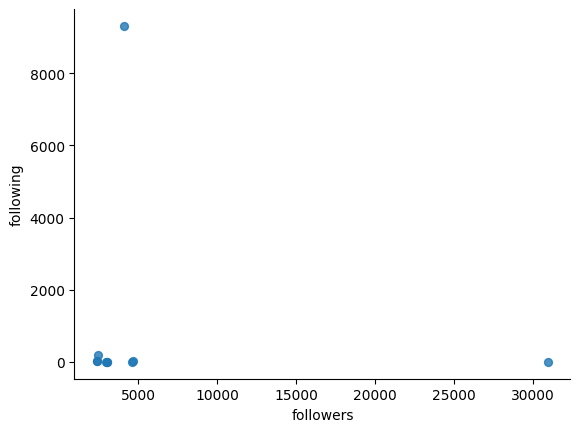

In [28]:
from matplotlib import pyplot as plt
df_users_filtered.nlargest(10,'followers').plot(kind='scatter', x='followers', y='following', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

In [29]:
df_users_filtered.groupby('company')['public_repos'].mean().nlargest(5)

,public_repos
company,
MYW3SCHOOLS.COM,1563.0
CRAFTSMAN SYSTEMS,913.0
AMEG-YAG,594.0
CLEVERINSIGHT,389.0
JIOCINEMA,351.0


In [30]:
top_10_users = df_users_filtered.nlargest(10, 'public_repos')
top_10_users

,login,name,company,location,email,hireable,bio,public_repos,followers,following,created_at,surname
3,manjunath5496,Manjunath.R,MYW3SCHOOLS.COM,"Bangalore, India",manjunath5496@gmail.com,False,"""Science is not only a disciple of reason but,...",1563,4091,9313,2016-06-16 05:02:32+00:00,Manjunath.R
409,Newton-School,Newton School,NaN,Bangalore,tech@newtonschool.co,False,NaN,1002,134,0,2020-04-29 13:56:53+00:00,School
66,tkmagesh,Magesh,CRAFTSMAN SYSTEMS,Bangalore,tkmagesh77@gmail.com,True,NaN,913,569,9,2009-10-07 12:08:28+00:00,Magesh
335,narayanr7,Security Trails,AMEG-YAG,Bangalore,NaN,True,Security Analyst. Checking Bugs and malware fo...,594,154,2056,2015-07-07 14:05:29+00:00,Trails
528,Tivotal,Tivotal,NaN,"Bangalore, India",NaN,False,Tivotal is an online learning platform which h...,564,112,0,2022-12-24 08:03:41+00:00,Tivotal
12,captn3m0,Nemo,NaN,"Bangalore, India",github.contact@captnemo.in,False,"Making and Breaking things, sometimes intentio...",436,1838,786,2011-01-26 08:56:27+00:00,Nemo
161,sangam14,Sangam Biradar,NaN,bangalore,NaN,True,Building Stacks ....,415,283,82,2016-09-04 08:19:04+00:00,Biradar
473,BastinRobin,Bastin Robin,CLEVERINSIGHT,"Bangalore, Nilgiris",NaN,True,Chief Data Scientist @CleverInsight #Programm...,389,120,465,2013-02-10 07:44:17+00:00,Robin
50,itaditya,Aditya Agarwal,ATLASSIAN,"Bangalore, India",adityaa803@gmail.com,True,"\r\n Web Dev @razorpay, GSoC Alum @github\r...",378,702,446,2015-11-16 13:08:12+00:00,Agarwal
49,hasura,Hasura,NaN,"San Francisco, Bangalore",build@hasura.io,False,"The Hasura GraphQL Engine gives you fast, inst...",377,710,0,2015-08-25 16:31:42+00:00,Hasura


In [31]:
df_repos_filtered.head()

,login,full_name,created_at,stargazers_count,watchers_count,language,has_projects,has_wiki,license_name,day_of_week
0,krishnaik06,krishnaik06/Polars-GPU-Engine-Demo,2024-10-28 08:42:45+00:00,4,4,Jupyter Notebook,True,True,gpl-3.0,0
1,krishnaik06,krishnaik06/Transformers-Materials,2024-10-19 15:43:30+00:00,11,11,NaN,True,True,gpl-3.0,5
2,krishnaik06,krishnaik06/ETLWeather,2024-10-15 10:45:09+00:00,8,8,Python,True,True,gpl-3.0,1
3,krishnaik06,krishnaik06/datasets,2024-10-08 05:16:12+00:00,3,3,NaN,True,True,gpl-3.0,1
4,krishnaik06,krishnaik06/testdagshub,2024-10-01 16:57:42+00:00,0,0,NaN,True,True,NaN,1


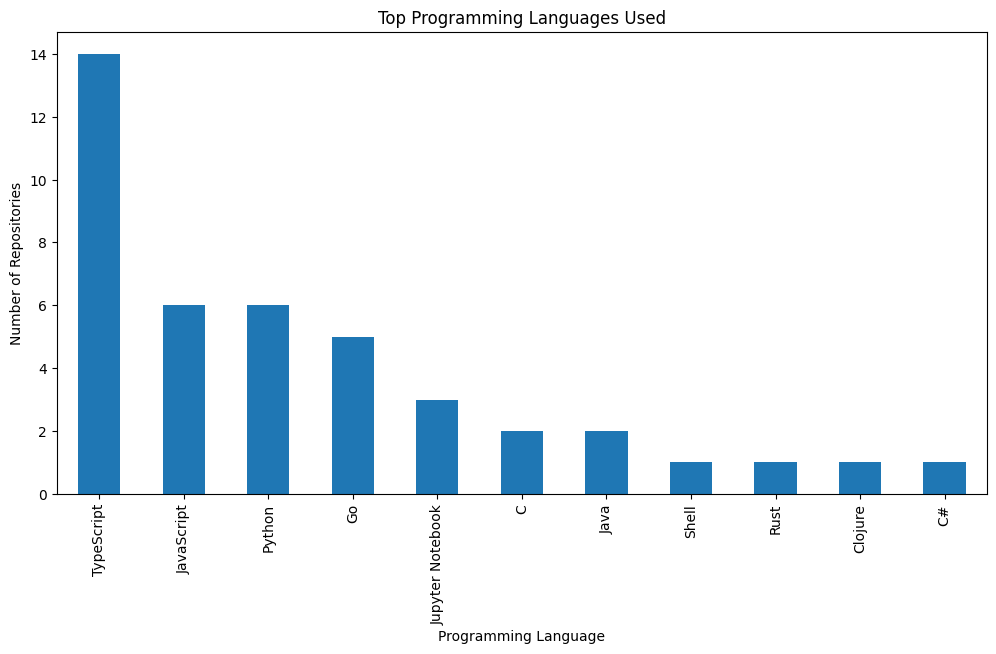

In [32]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
reposwith_top_stars = df_repos_filtered.nlargest(50, 'watchers_count')

reposwith_top_stars['language'].value_counts().head(20).plot(kind='bar')
plt.xlabel('Programming Language')
plt.ylabel('Number of Repositories')
_ = plt.title('Top Programming Languages Used')

In [33]:
top_starred_repos = df_repos_filtered.nlargest(10, 'stargazers_count')
top_starred_users = top_starred_repos['login'].tolist()
df_users_filtered[df_users_filtered['login'].isin(top_starred_users)]

,login,name,company,location,email,hireable,bio,public_repos,followers,following,created_at,surname
6,Hack-with-Github,Hack with GitHub,NaN,"Bangalore, India",hackwithgithub@gmail.com,False,An Open Source Hacking Tools database.,11,2973,0,2016-03-29 13:14:08+00:00,GitHub
7,rahuldkjain,Rahul Jain,THOUGHTSPOT,"Bangalore, India",NaN,True,Software Engineer 👨‍💻\r\nReact.js and Motion D...,97,2426,193,2017-03-14 10:23:00+00:00,Jain
23,ad1992,Aakansha Doshi,OPEN-SOURCE,Bangalore,aakansha1216@gmail.com,True,"open-source | maintainer excalidraw, mermaid-t...",51,1166,50,2015-03-01 12:33:19+00:00,Doshi
25,bigint,Bigint,HEYXYZ,"Bangalore, India",NaN,True,Creator of @heyxyz 🌸,20,1118,198,2020-08-09 17:17:58+00:00,Bigint
49,hasura,Hasura,NaN,"San Francisco, Bangalore",build@hasura.io,False,"The Hasura GraphQL Engine gives you fast, inst...",377,710,0,2015-08-25 16:31:42+00:00,Hasura
71,HashNuke,Akash Manohar,NaN,Bangalore,NaN,False,"Created asdf version manager, Heroku Buildpack...",163,553,2,2009-05-13 07:53:25+00:00,Manohar
108,shahidhk,Shahidh K Muhammed,HASURA,Bangalore,shahidhkmuhammed@gmail.com,False,Engineer at @hasura,153,368,6,2013-04-11 09:43:16+00:00,Muhammed
129,maddhruv,Dhruv Jain,LINKEDIN,Bangalore,dhjain@linkedin.com,True,Observability at @linkedin,125,330,181,2016-03-28 16:21:12+00:00,Jain
569,dstala,Raju Udava,NOCODB,Bangalore,NaN,False,NaN,8,103,809,2021-06-26 15:28:02+00:00,Udava
572,arjunmahishi,Arjun Mahishi,COCKROACHDB,Bangalore,arjun.mahishi@gmail.com,True,NaN,127,103,42,2015-04-16 11:26:50+00:00,Mahishi


In [34]:
top_followed_users = df_users_filtered.nlargest(10, 'followers')
df_repos_filtered[df_repos_filtered['login'].isin(top_followed_users['login'])].sort_values(by='stargazers_count', ascending=False).head(5)

,login,full_name,created_at,stargazers_count,watchers_count,language,has_projects,has_wiki,license_name,day_of_week
1647,Hack-with-Github,Hack-with-Github/Awesome-Hacking,2016-03-30 15:47:10+00:00,84478,84478,NaN,False,False,cc0-1.0,2
1661,rahuldkjain,rahuldkjain/github-profile-readme-generator,2020-07-15 11:20:48+00:00,21564,21564,JavaScript,True,True,apache-2.0,2
13,krishnaik06,krishnaik06/The-Grand-Complete-Data-Science-Ma...,2023-09-19 06:19:22+00:00,6820,6820,Python,True,True,gpl-2.0,1
1651,Hack-with-Github,Hack-with-Github/Free-Security-eBooks,2016-04-21 12:26:50+00:00,4322,4322,NaN,True,False,NaN,3
30,krishnaik06,krishnaik06/Roadmap-To-Learn-Generative-AI-In-...,2023-12-11 11:43:22+00:00,3216,3216,NaN,True,False,gpl-3.0,0


In [35]:
df_users_filtered.groupby('company')['email'].count().nlargest(5)

,email
company,
GOOGLE,11
RAZORPAY,6
MICROSOFT,5
GOJEK,3
LINKEDIN,3


In [36]:
len(df_repos_filtered['language'].unique())

175

In [37]:
language_counts = df_repos_filtered['language'].value_counts()
low_repo_languages = language_counts[language_counts <= 3]
low_repo_languages

,count
language,
Logos,3
Mathematica,3
Nunjucks,3
Objective-C++,3
Just,3
...,...
Typst,1
Sass,1
RAML,1


In [38]:
low_langs = low_repo_languages.index.tolist()
df_repos_filtered[df_repos_filtered['language'].isin(low_langs)].nlargest(5, 'stargazers_count')

,login,full_name,created_at,stargazers_count,watchers_count,language,has_projects,has_wiki,license_name,day_of_week
12191,0x48piraj,0x48piraj/incarcero,2017-05-15 08:27:33+00:00,92,92,Pascal,True,True,gpl-3.0,0
4520,saiyam1814,cncf/cloudnativetv,2021-02-26 17:55:51+00:00,34,34,CUE,True,True,apache-2.0,4
14941,ameerthehacker,ameerthehacker/ts-native,2020-03-11 13:28:08+00:00,28,28,ANTLR,True,True,NaN,2
5138,anandology,internetarchive/CDX-Writer,2012-07-17 23:07:24+00:00,20,20,Arc,True,True,agpl-3.0,1
14533,kunalg123,kunalg123/riscv_workshop_collaterals,2020-03-09 14:58:17+00:00,20,20,Coq,True,True,NaN,0
